# Predict the Diabetes

In [ ]:
#@title Download Requirements
from IPython.display import clear_output

!pip install --user kaggle
!pip install scikit-learn

clear_output()

print ("Done!")

Done!


In [ ]:
 import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

from google.colab import drive
from tqdm.notebook import trange, tqdm
from IPython.display import clear_output


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Download and Preprocess the Dataset

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/ML/predict_the_diabetes/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/ML/predict_the_diabetes/test.csv')


In [ ]:
train_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Id
0,6,148,72,35,0,33.6,0.627,50,1,0
1,8,183,64,0,0,23.3,0.672,32,1,2
2,1,89,66,23,94,28.1,0.167,21,0,3
3,10,115,0,0,0,35.3,0.134,29,0,7
4,2,197,70,45,543,30.5,0.158,53,1,8
5,4,110,92,0,0,37.6,0.191,30,0,10
6,10,168,74,0,0,38.0,0.537,34,1,11
7,5,166,72,19,175,25.8,0.587,51,1,14
8,7,100,0,0,0,30.0,0.484,32,1,15
9,0,118,84,47,230,45.8,0.551,31,1,16


In [ ]:
test_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Id
0,1,85,66,29,0,26.6,0.351,31,1
1,0,137,40,35,168,43.1,2.288,33,4
2,5,116,74,0,0,25.6,0.201,30,5
3,3,78,50,32,88,31.0,0.248,26,6
4,8,125,96,0,0,0.0,0.232,54,9
5,10,139,80,0,0,27.1,1.441,57,12
6,1,189,60,23,846,30.1,0.398,59,13
7,1,115,70,30,96,34.6,0.529,32,19
8,3,126,88,41,235,39.3,0.704,27,20
9,13,145,82,19,110,22.2,0.245,57,28


In [ ]:
#@title Split Validation Set
train_df = train_df.drop(['Id'], axis=1)
val_df = train_df.iloc[int(train_df.shape[0]*0.75):, :]
train_df = train_df.iloc[:int(train_df.shape[0]*0.75), :]

In [ ]:
unique_pregs = train_df['Pregnancies'].unique()
unique_pregs = np.sort(unique_pregs)
cnt_unique_pregs = unique_pregs.size

u_ages = train_df['Age'].unique()
u_ages = np.sort(u_ages)
cnt_unique_ages = u_ages.size

unique_pressures = train_df['Pregnancies'].unique()
unique_pressures = np.sort(unique_pressures)
cnt_unique_pressures = unique_pregs.size

In [ ]:
#@title Remove Records
#@markdown Remove records with **bloodpressure lower than 10 mmHg** or **glocose equals to zero**

proc_train_df = train_df[train_df["BloodPressure"] >= 10]
proc_train_df = proc_train_df[proc_train_df["Glucose"] != 0]

Text(0.5, 1.0, 'Refined Train Dataset')

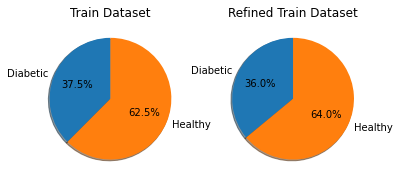

In [ ]:
labels  = 'Diabetic' , 'Healthy'
t_cnt_d = train_df['Outcome'].sum()
t_cnt_h = train_df['Outcome'].size - t_cnt_d
t_sizes = [t_cnt_d, t_cnt_h]

p_cnt_d = proc_train_df['Outcome'].sum()
p_cnt_h = proc_train_df['Outcome'].size - p_cnt_d
p_sizes = [p_cnt_d, p_cnt_h]


fig1, axs = plt.subplots(1, 2)
axs[0].pie(t_sizes, labels=labels, shadow=True, startangle=90, autopct='%1.1f%%')
axs[0].set_title("Train Dataset")
axs[1].pie(p_sizes, labels=labels, shadow=True, startangle=90, autopct='%1.1f%%')
axs[1].set_title("Refined Train Dataset")

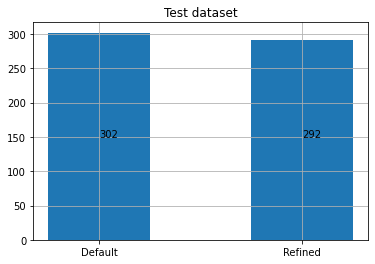

In [ ]:
proc_test_df = test_df[test_df["BloodPressure"]>=10]
proc_test_df = proc_test_df[proc_test_df["Glucose"] != 0]
yt = np.array([test_df.shape[0], proc_test_df.shape[0]])
plt.bar([1,2], yt, width=0.5,tick_label=["Default", "Refined"])
plt.title("Test dataset")
plt.text(1, 150, str(yt[0]))
plt.text(2, 150, str(yt[1]))
plt.grid()
plt.show()

### Features Distribution
In this section we compare features distribution over all preprocessing methods and see the impact of preprocessing over them.

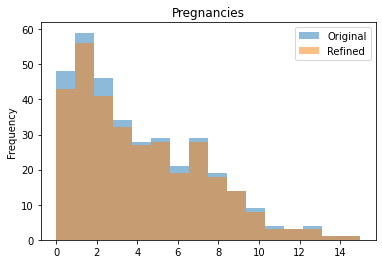

In [ ]:
tmp_df = train_df['Pregnancies']
ax = tmp_df.plot.hist(bins=cnt_unique_pregs, alpha=0.5, title="Pregnancies", label="Original", legend=True)
tmp_df = proc_train_df['Pregnancies']
ax = tmp_df.plot.hist(bins=cnt_unique_pregs, alpha=0.5, title="Pregnancies", label="Refined", legend=True)
plt.show()

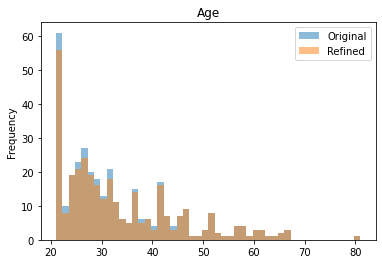

In [ ]:
tmp_df = train_df['Age']
ax = tmp_df.plot.hist(by='Age', bins=cnt_unique_ages, alpha=0.5, title="Age", label="Original", legend=True)
tmp_df = proc_train_df['Age']
ax = tmp_df.plot.hist(by='Age', bins=cnt_unique_ages, alpha=0.5, title="Age", label="Refined", legend=True)
plt.show()

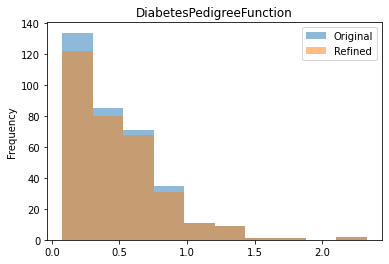

In [ ]:
tmp_df = train_df['DiabetesPedigreeFunction']
ax = tmp_df.plot.hist(by='DiabetesPedigreeFunction', bins=10, alpha=0.5, title="DiabetesPedigreeFunction", label="Original", legend=True)
tmp_df = proc_train_df['DiabetesPedigreeFunction']
ax = tmp_df.plot.hist(by='DiabetesPedigreeFunction', bins=10, alpha=0.5, title="DiabetesPedigreeFunction", label="Refined", legend=True)
plt.show()

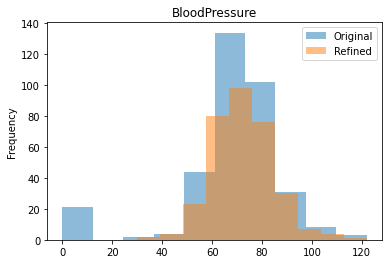

In [ ]:
tmp_df = train_df['BloodPressure']
ax = tmp_df.plot.hist(by='BloodPressure', bins=10, alpha=0.5, title="BloodPressure", label="Original", legend=True)
tmp_df = proc_train_df['BloodPressure']
ax = tmp_df.plot.hist(by='BloodPressure', bins=10, alpha=0.5, title="BloodPressure", label="Refined", legend=True)
plt.show()

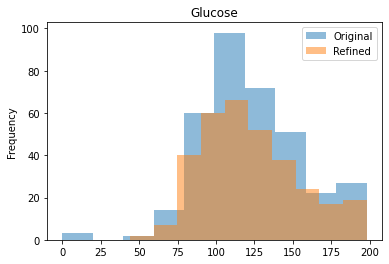

In [ ]:
tmp_df = train_df['Glucose']
ax = tmp_df.plot.hist(by='Glucose', bins=10, alpha=0.5, title="Glucose", label="Original", legend=True)
tmp_df = proc_train_df['Glucose']
ax = tmp_df.plot.hist(by='Glucose', bins=10, alpha=0.5, title="Glucose", label="Refined", legend=True)
plt.show()

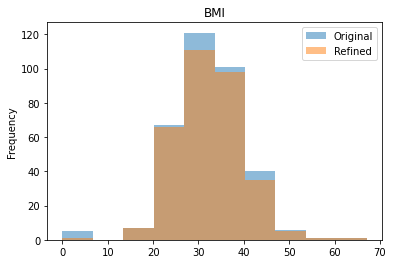

<class 'matplotlib.axes._subplots.AxesSubplot'>


In [ ]:
tmp_df = train_df['BMI']
ax = tmp_df.plot.hist(by='BMI', bins=10, alpha=0.5, title="BMI", label="Original", legend=True)
tmp_df = proc_train_df['BMI']
ax = tmp_df.plot.hist(by='BMI', bins=10, alpha=0.5, title="BMI", label="Refined", legend=True)
plt.show()
print(type(ax))

### Features Relation and Dependency

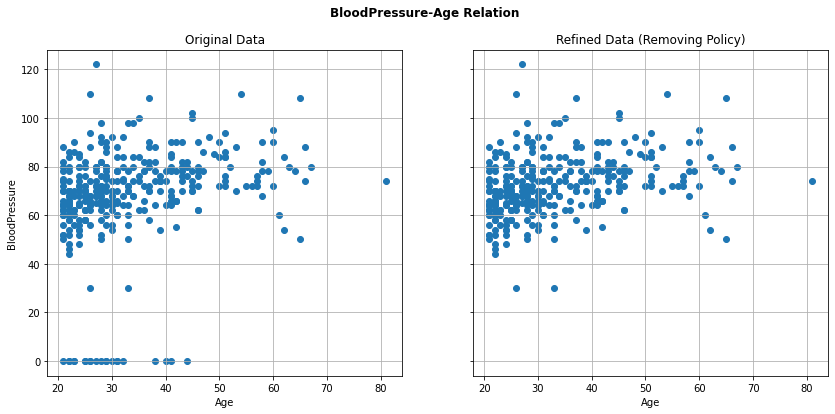

In [ ]:
fig , axs = plt.subplots(1, 2, sharey=True, figsize=(14,6))
fig.suptitle("BloodPressure-Age Relation", fontweight="heavy")
axs[0].scatter(train_df['Age'], train_df['BloodPressure'])
axs[0].set_title("Original Data")
axs[0].grid()
axs[1].scatter(proc_train_df['Age'], proc_train_df['BloodPressure'],)
axs[1].set_title("Refined Data (Removing Policy)")
axs[1].grid()
for ax in axs.flat:
  ax.set(xlabel="Age", ylabel="BloodPressure")

for ax in axs.flat:
    ax.label_outer()

plt.show()

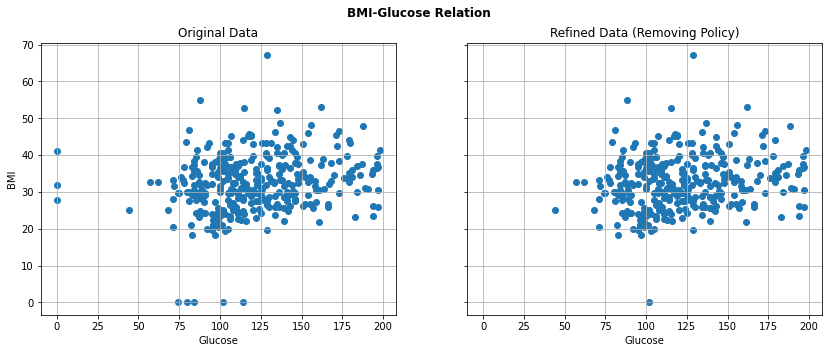

In [ ]:
fig , axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14,5))
fig.suptitle("BMI-Glucose Relation", fontweight="heavy")
axs[0].scatter(train_df['Glucose'], train_df['BMI'],)
axs[0].set_title("Original Data")
axs[0].grid()
axs[1].scatter(proc_train_df['Glucose'], proc_train_df['BMI'],)
axs[1].set_title("Refined Data (Removing Policy)")
axs[1].grid()
for ax in axs.flat:
  ax.set(xlabel="Glucose", ylabel="BMI")

for ax in axs.flat:
    ax.label_outer()

plt.show()

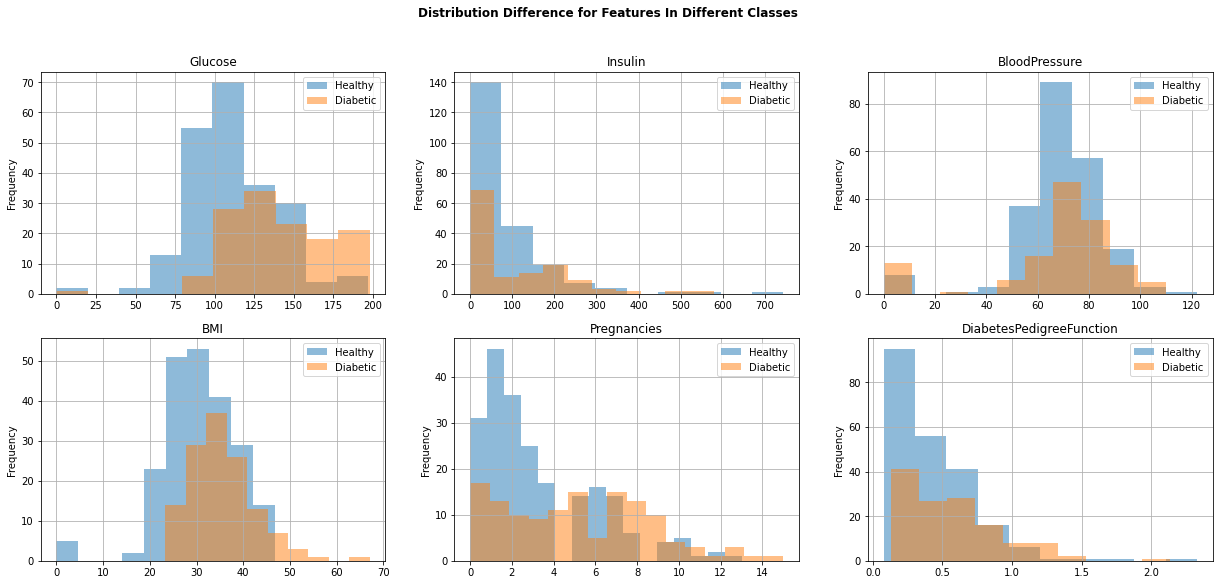

In [ ]:
#@title Features Distribution Over Diabetics and Healthy Classes
healthy_df = train_df[train_df["Outcome"] == 0]
diabetic_df = train_df[train_df["Outcome"] == 1]

fig , axs = plt.subplots(2, 3, figsize=(21,9))
fig.suptitle("Distribution Difference for Features In Different Classes", fontweight="heavy")
axs[0, 0].hist(x=healthy_df["Glucose"].to_numpy(), bins=10, alpha=0.5, label="Healthy", stacked=True)
axs[0, 0].hist(x=diabetic_df["Glucose"].to_numpy(), bins=10, alpha=0.5, label="Diabetic", stacked=True)
axs[0, 0].set_title("Glucose")
axs[0, 1].hist(x=healthy_df["Insulin"].to_numpy(), bins=10, alpha=0.5, label="Healthy", stacked=True)
axs[0, 1].hist(x=diabetic_df["Insulin"].to_numpy(), bins=10, alpha=0.5, label="Diabetic", stacked=True)
axs[0, 1].set_title("Insulin")
axs[0, 2].hist(x=healthy_df["BloodPressure"].to_numpy(), bins=10, alpha=0.5, label="Healthy", stacked=True)
axs[0, 2].hist(x=diabetic_df["BloodPressure"].to_numpy(), bins=10, alpha=0.5, label="Diabetic", stacked=True)
axs[0, 2].set_title("BloodPressure")
axs[1, 0].hist(x=healthy_df["BMI"].to_numpy(), bins=10, alpha=0.5, label="Healthy", stacked=True)
axs[1, 0].hist(x=diabetic_df["BMI"].to_numpy(), bins=10, alpha=0.5, label="Diabetic", stacked=True)
axs[1, 0].set_title("BMI")
axs[1, 1].hist(x=healthy_df["Pregnancies"].to_numpy(), bins=cnt_unique_pregs, alpha=0.5, label="Healthy", stacked=True)
axs[1, 1].hist(x=diabetic_df["Pregnancies"].to_numpy(), bins=cnt_unique_pregs, alpha=0.5, label="Diabetic", stacked=True)
axs[1, 1].set_title("Pregnancies")
axs[1, 2].hist(x=healthy_df["DiabetesPedigreeFunction"].to_numpy(), bins=10, alpha=0.5, label="Healthy", stacked=True)
axs[1, 2].hist(x=diabetic_df["DiabetesPedigreeFunction"].to_numpy(), bins=10, alpha=0.5, label="Diabetic", stacked=True)
axs[1, 2].set_title("DiabetesPedigreeFunction")

for ax in axs.flat:
  ax.grid()
  ax.legend(loc='upper right')
  ax.set(ylabel="Frequency")

plt.savefig("Distribution_Difference_for_Features_In_Different_Target_Classes_normal_data")
plt.show()

## Basic Learning Models
In this section we use different models and get different metrics valus to select the best predicting model for diabetic persons.

---

We will draw confusion matrix for each model and use the following metrics to discuss about different models.



*   Accuracy
*   F1 Score
*   Recall Score
*   Precision Score



In [ ]:
# Prepare x and y for training
y =  train_df["Outcome"].to_numpy()
x = train_df.loc[:, train_df.columns != "Outcome"].to_numpy()

# Prepare x and y for validation
y_val = val_df["Outcome"].to_numpy()
x_val = val_df.loc[:, val_df.columns != "Outcome"].to_numpy()

# Prepare x and y for refined training set
proc_y = proc_train_df["Outcome"].to_numpy()
proc_x = proc_train_df.loc[:, proc_train_df.columns != "Outcome"].to_numpy()

# Prepare x for testing
x_test = test_df.loc[:, test_df.columns != "Id"].to_numpy()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import RocCurveDisplay

def draw_confusion_matrix(true_y, pred_y, fig_name=None):
  cm = confusion_matrix(true_y, pred_y)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["healthy", "diabetic"])
  disp.plot()
  if fig_name is not None:
    plt.savefig(fig_name)
  plt.show()

### Base Line: Linear Regression
In this section we try linear and logestic regression to predict the model. We will consider all the given data in the first pace. Then we try to use this models using refined data.

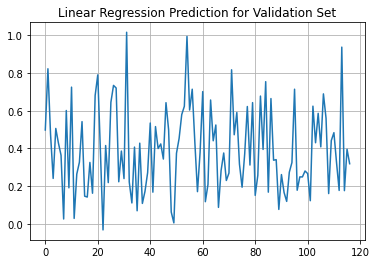

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x,y)

y_pred_val = reg.predict(x_val)
plt.plot(np.arange(0, y_pred_val.shape[0], 1),y_pred_val)
plt.title("Linear Regression Prediction for Validation Set")
plt.grid()
plt.show()

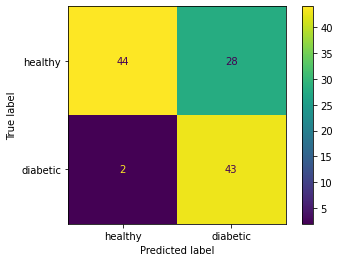

Accuracy =  0.7435897435897436
F1 Score =  0.7413793103448275
Recall Score =  0.9555555555555556
Precision Score =  0.6056338028169014


In [ ]:
threshold =  0.3#@param {type:"number"}

y_pred_val = reg.predict(x_val)
y_mean = np.mean(y_pred_val)
y_pred_val = y_pred_val - threshold
y_pred_val = np.where(y_pred_val<0, 0, y_pred_val)
y_pred_val = np.where(y_pred_val>0, 1, y_pred_val)
draw_confusion_matrix(
    y_val,
    y_pred_val,
    #fig_name=("BaseLine_Linear_Reg_threshold_"+str(threshold)).replace(".", "_")
  )
print("Accuracy = ", accuracy_score(y_val, y_pred_val))
print("F1 Score = ", f1_score(y_val, y_pred_val))
print("Recall Score = ", recall_score(y_val, y_pred_val))
print("Precision Score = ", precision_score(y_val, y_pred_val))

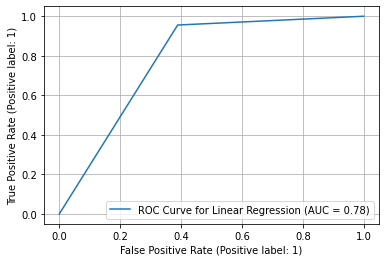

In [ ]:
RocCurveDisplay.from_predictions(y_val, y_pred_val, name="ROC Curve for Linear Regression")
plt.grid()
plt.show()

In [ ]:
thr = 0.0
accs = []
f1s = []
recalls = []
precisions = []
thrs = []
for i in range(21):
  thrs.append(thr)
  y_pred_val = reg.predict(x)
  y_mean = np.mean(y_pred_val)
  y_pred_val = y_pred_val - thr
  y_pred_val = np.where(y_pred_val<0, 0, y_pred_val)
  y_pred_val = np.where(y_pred_val>0, 1, y_pred_val)
  draw_confusion_matrix(
      y,
      y_pred_val,
      fig_name=("Train_BaseLine_Linear_Reg_threshold_"+str(thr)).replace(".", "_")
    )
  accs.append(accuracy_score(y, y_pred_val))
  f1s.append(f1_score(y, y_pred_val))
  recalls.append(recall_score(y, y_pred_val))
  precisions.append(precision_score(y, y_pred_val))
  thr += 0.05

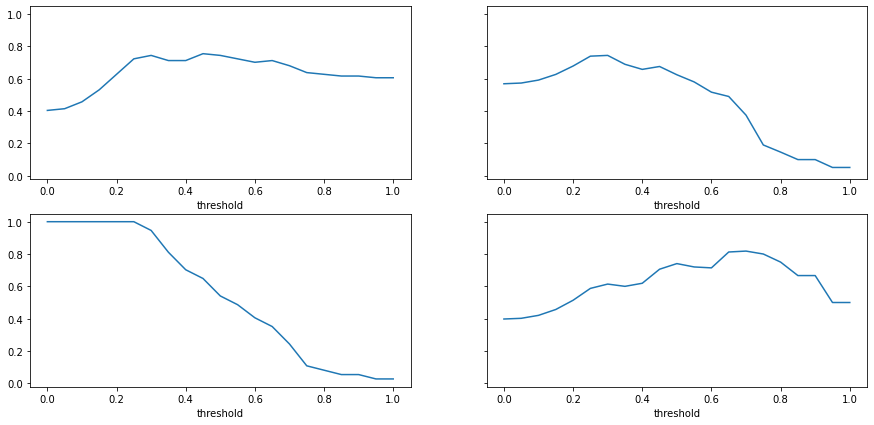

In [ ]:
fig , axs = plt.subplots(2, 2, sharey=True, figsize=(15,7))
axs[0, 0].plot(thrs, accs)

axs[0, 1].plot(thrs, f1s)

axs[1, 0].plot(thrs, recalls)

axs[1, 1].plot(thrs, precisions)

for ax in axs.flat:
  ax.set(xlabel="threshold")

plt.show()

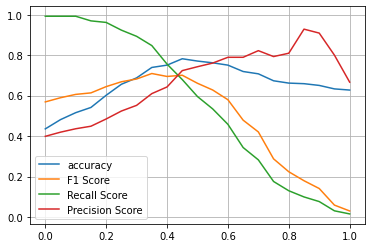

In [ ]:
plt.plot(thrs, accs, label="accuracy")
plt.plot(thrs, f1s, label="F1 Score")
plt.plot(thrs, recalls, label="Recall Score")
plt.plot(thrs, precisions, label="Precision Score")
plt.legend()
plt.grid()
plt.show()

In [ ]:
#@title Save test set result to file
d = {'Id': test_df["Id"], 'Outcome': y_val.astype('int32')}
res_df = pd.DataFrame(data=d)
res_df.to_csv(path_or_buf='/content/drive/MyDrive/ML/predict_the_diabetes/res1.csv', index=False)

For refined training dataset

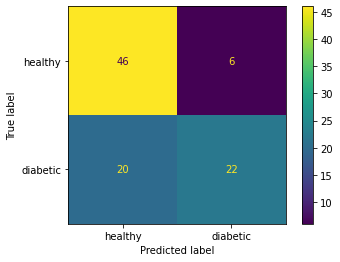

In [ ]:
reg = LinearRegression().fit(proc_x,proc_y)
y_pred_val = reg.predict(x_val)
y_mean = np.mean(y_pred_val)
y_pred_val = y_pred_val - 0.5
y_pred_val = np.where(y_pred_val<0, 0, y_pred_val)
y_pred_val = np.where(y_pred_val>0, 1, y_pred_val)
draw_confusion_matrix(y_val, y_pred_val)

In [ ]:
print("F1 Score = ", f1_score(y_val, y_pred_val))

F1 Score =  0.6285714285714286


In [ ]:
#@title Save test set result to file
y_test = reg.predict(x_test)
d = {'Id': test_df["Id"], 'Outcome': y_test.astype('int32')}
res_df = pd.DataFrame(data=d)
res_df.to_csv(path_or_buf='/content/drive/MyDrive/ML/predict_the_diabetes/prec_res1.csv', index=False)

### Ridge Regression


In [ ]:
from sklearn.linear_model import Ridge

r_reg = Ridge(alpha=1.0)
r_reg.fit(x,y)



Ridge()

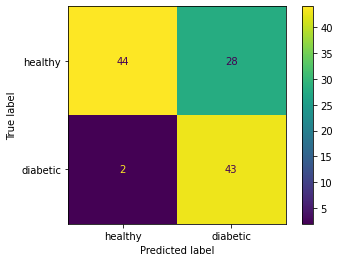

Accuracy =  0.7435897435897436
F1 Score =  0.7413793103448275
Recall Score =  0.9555555555555556
Precision Score =  0.6056338028169014


In [ ]:
#@title Run on validation set
threshold =  0.3#@param {type:"number"}

ridge_y_val = r_reg.predict(x_val)
ridge_y_mean = np.mean(ridge_y_val)
ridge_y_val = ridge_y_val - threshold
ridge_y_val = np.where(ridge_y_val<0, 0, ridge_y_val)
ridge_y_val = np.where(ridge_y_val>0, 1, ridge_y_val)
draw_confusion_matrix(
    y_val,
    ridge_y_val,
    fig_name=("Ridge_Reg_threshold_"+str(threshold)).replace(".", "_")
  )

print("Accuracy = ", accuracy_score(y_val, ridge_y_val))
print("F1 Score = ", f1_score(y_val, ridge_y_val))
print("Recall Score = ", recall_score(y_val, ridge_y_val))
print("Precision Score = ", precision_score(y_val, ridge_y_val))


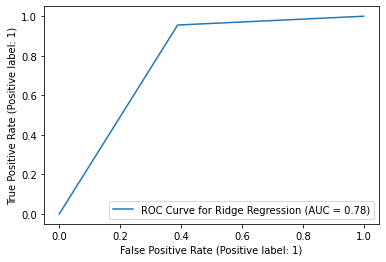

In [ ]:
RocCurveDisplay.from_predictions(y_val, ridge_y_val, name="ROC Curve for Ridge Regression")
plt.show()

In [ ]:
#@title Save test set result to file

d = {'Id': test_df["Id"], 'Outcome': ridge_y_val.astype('int32')}
res_df = pd.DataFrame(data=d)
res_df.to_csv(path_or_buf='/content/drive/MyDrive/ML/predict_the_diabetes/res2.csv', index=False)

### Ridge Classifier


In [ ]:
from sklearn.linear_model import RidgeClassifier

r_clf = RidgeClassifier()
r_clf.fit(x,y)



RidgeClassifier()

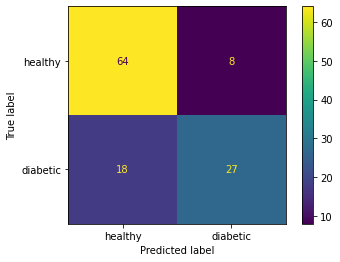

Accuracy =  0.7777777777777778
F1 Score =  0.675
Recall Score =  0.6
Precision Score =  0.7714285714285715


In [ ]:
#@title Run on validation set
ridge_clf_y_val = r_clf.predict(x_val)
draw_confusion_matrix(y_val, ridge_clf_y_val)
print("Accuracy = ", accuracy_score(y_val, ridge_clf_y_val))
print("F1 Score = ", f1_score(y_val, ridge_clf_y_val))
print("Recall Score = ", recall_score(y_val, ridge_clf_y_val))
print("Precision Score = ", precision_score(y_val, ridge_clf_y_val))


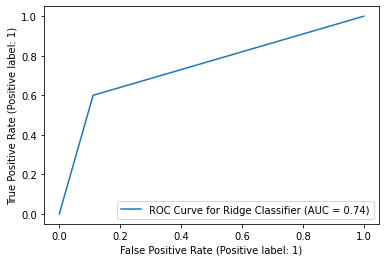

In [ ]:
RocCurveDisplay.from_predictions(y_val, ridge_clf_y_val, name="ROC Curve for Ridge Classifier")
plt.show()

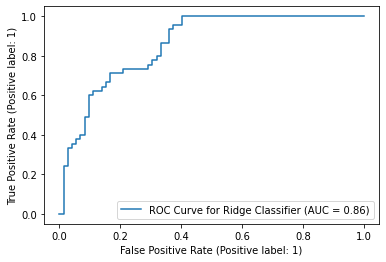

In [ ]:
RocCurveDisplay.from_estimator(r_clf, x_val, y_val, name="ROC Curve for Ridge Classifier")
plt.show()

In [ ]:
#@title Save test set result to file

y_test = r_clf.predict(x_test)
d = {'Id': test_df["Id"], 'Outcome': y_test.astype('int32')}
res_df = pd.DataFrame(data=d)
res_df.to_csv(path_or_buf='/content/drive/MyDrive/ML/predict_the_diabetes/ridge_clf.csv', index=False)

### Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty='l2', max_iter=500)
log_reg.fit(x,y)

LogisticRegression(max_iter=500)

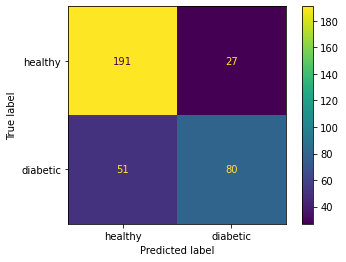

Accuracy =  0.7765042979942693
F1 Score =  0.6722689075630253
Recall Score =  0.6106870229007634
Precision Score =  0.7476635514018691


In [ ]:
#@title Run on validation set

log_reg_y_val = log_reg.predict(x)
draw_confusion_matrix(y, log_reg_y_val)
print("Accuracy = ", accuracy_score(y, log_reg_y_val))
print("F1 Score = ", f1_score(y, log_reg_y_val))
print("Recall Score = ", recall_score(y, log_reg_y_val))
print("Precision Score = ", precision_score(y, log_reg_y_val))

In [ ]:
RocCurveDisplay.from_predictions(y_val, log_reg_y_val, name="ROC Curve for Logistic Regression")
plt.show()

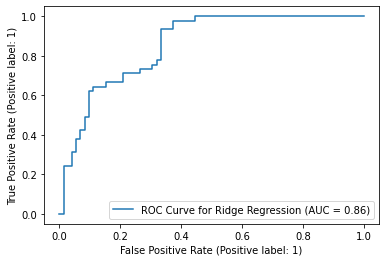

In [ ]:
RocCurveDisplay.from_estimator(log_reg, x_val, y_val, name="ROC Curve for Ridge Regression")
plt.show()

In [ ]:
#@title Save test set result to file

d = {'Id': test_df["Id"], 'Outcome': log_reg_y_val.astype('int32')}
res_df = pd.DataFrame(data=d)
res_df.to_csv(path_or_buf='/content/drive/MyDrive/ML/predict_the_diabetes/res4.csv', index=False)

### K-NN

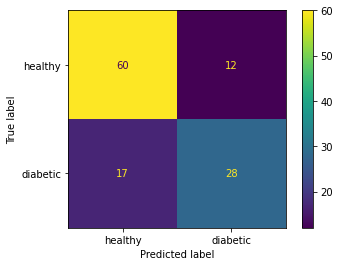

Accuracy =  0.7521367521367521
F1 Score =  0.6588235294117647
Recall Score =  0.6222222222222222
Precision Score =  0.7


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neighbors_count =  10#@param {type:"integer"}
weights_values = "distance" #@param ["uniform", "distance"]
algorithm = "ball_tree" #@param ["auto", "ball_tree", "kd_tree", "brute"]


neigh = KNeighborsClassifier(
    n_neighbors=neighbors_count,
    weights=weights_values,
    algorithm=algorithm
  )
neigh.fit(x,y)
knn_y_val = neigh.predict(x_val)
draw_confusion_matrix(y_val, knn_y_val)
print("Accuracy = ", accuracy_score(y_val, knn_y_val))
print("F1 Score = ", f1_score(y_val, knn_y_val))
print("Recall Score = ", recall_score(y_val, knn_y_val))
print("Precision Score = ", precision_score(y_val, knn_y_val))

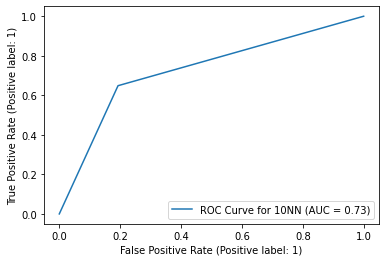

In [ ]:
RocCurveDisplay.from_predictions(y_val, knn_y_val, name="ROC Curve for {}NN".format(neighbors_count))
plt.show()

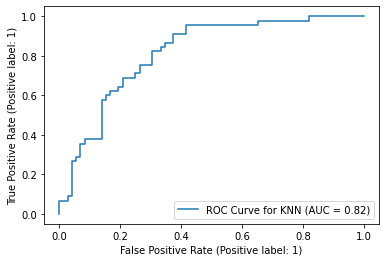

In [ ]:
RocCurveDisplay.from_estimator(neigh, x_val, y_val, name="ROC Curve for KNN")
plt.show()

In [ ]:
d = {'Id': test_df["Id"], 'Outcome': knn_y_val.astype('int32')}
res_df = pd.DataFrame(data=d)
res_df.to_csv(
    path_or_buf='/content/drive/MyDrive/ML/predict_the_diabetes/{}.csv'.format(str(neighbors_count)+"nn_"+weights_values+"_"+algorithm),
    index=False
  )

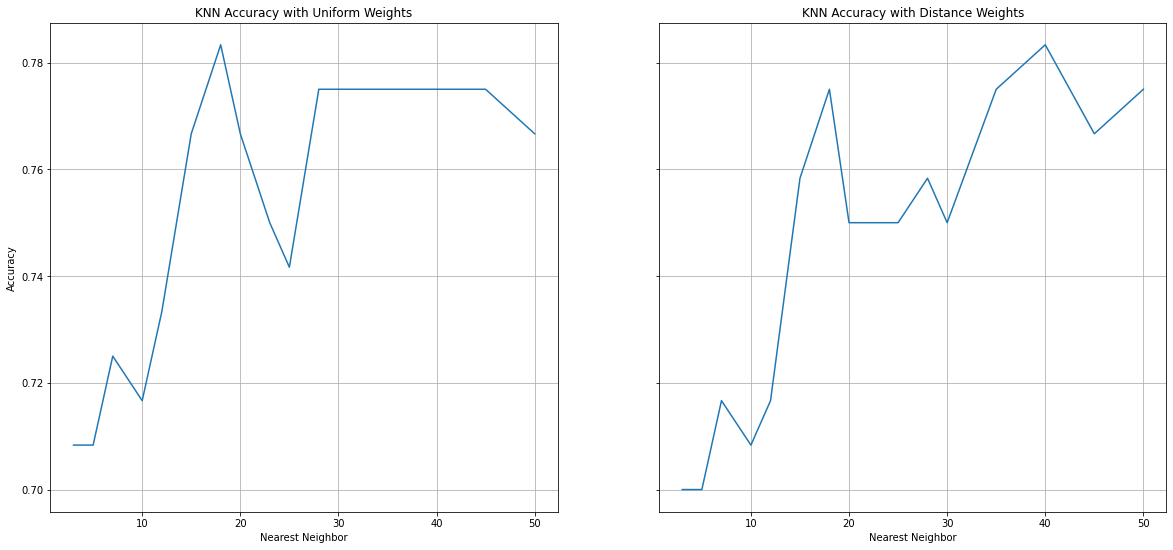

In [ ]:
#@title Test Results Over Different Values of K in KNN Algorithm

x_axis = np.array([3, 5, 7, 10, 12, 15, 18, 20, 23, 25, 28, 30, 35, 40, 45, 50], dtype=int)
yu_axis = np.array([0.70833,0.70833, 0.72500, 0.71666, 0.73333, 0.76666, 0.78333, 0.76666, 0.75000, 0.74166, 0.77500, 0.77500, 0.77500, 0.77500, 0.77500, 0.76666])
yd_axis = np.array([0.70000,0.70000, 0.71666, 0.70833, 0.71666, 0.75833, 0.77500, 0.75000, 0.75000, 0.75000, 0.75833, 0.75000, 0.77500, 0.78333, 0.76666, 0.77500])

fig, axs = plt.subplots(1, 2, figsize=(20,9), sharey='row')
axs[0].plot(x_axis, yu_axis)
axs[0].set_title("KNN Accuracy with Uniform Weights")
axs[0].set_xlabel('Nearest Neighbor')
axs[0].set_ylabel('Accuracy')
axs[0].grid(True)
axs[1].plot(x_axis, yd_axis)
axs[1].set_title("KNN Accuracy with Distance Weights")
axs[1].set_xlabel('Nearest Neighbor')
axs[1].grid(True)


##Clustering

###K-Means

In [ ]:
from sklearn.cluster import KMeans

clu = KMeans(n_clusters=2, n_init=30, max_iter=1000)
clu.fit(x)

KMeans(max_iter=1000, n_clusters=2, n_init=30)

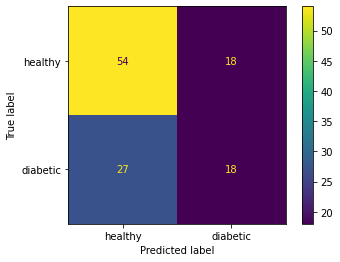

Accuracy =  0.6153846153846154
F1 Score =  0.4444444444444445
Recall Score =  0.4
Precision Score =  0.5


In [ ]:
#@title Run on validation data

kmeans_y_val = clu.predict(x_val)
draw_confusion_matrix(y_val, kmeans_y_val)
print("Accuracy = ", accuracy_score(y_val, kmeans_y_val))
print("F1 Score = ", f1_score(y_val, kmeans_y_val))
print("Recall Score = ", recall_score(y_val, kmeans_y_val))
print("Precision Score = ", precision_score(y_val, kmeans_y_val))

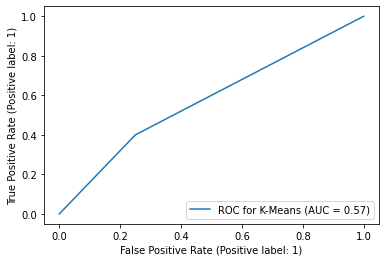

In [ ]:
RocCurveDisplay.from_predictions(y_val, kmeans_y_val, name="ROC for K-Means")
plt.show()

###Mini Batch K-Means

In [ ]:
from sklearn.cluster import MiniBatchKMeans

mclu = MiniBatchKMeans(n_clusters=2, max_iter=200, batch_size=70, random_state=2, )
mclu.fit(x)

MiniBatchKMeans(batch_size=70, max_iter=200, n_clusters=2, random_state=2)

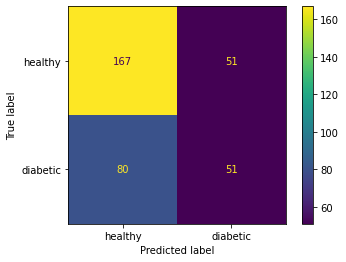

Accuracy =  0.6246418338108882
F1 Score =  0.4377682403433476
Recall Score =  0.3893129770992366
Precision Score =  0.5


In [ ]:
#@title Run on validation data

mb_kmeans_y = mclu.predict(x)
draw_confusion_matrix(y, mb_kmeans_y)
print("Accuracy = ", accuracy_score(y, mb_kmeans_y))
print("F1 Score = ", f1_score(y, mb_kmeans_y))
print("Recall Score = ", recall_score(y, mb_kmeans_y))
print("Precision Score = ", precision_score(y, mb_kmeans_y))

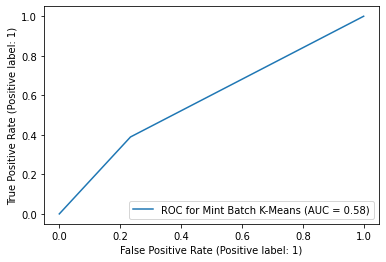

In [ ]:
RocCurveDisplay.from_predictions(y, mb_kmeans_y, name="ROC for Mint Batch K-Means")
plt.show()

## SVM

### Linear SVC

In [ ]:
max_iterations =  30000#@param {type:"integer"}

from sklearn.svm import LinearSVC



lsvc_clf = LinearSVC(random_state=5, max_iter=max_iterations, C=1)
lsvc_clf.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=1, max_iter=30000, random_state=5)

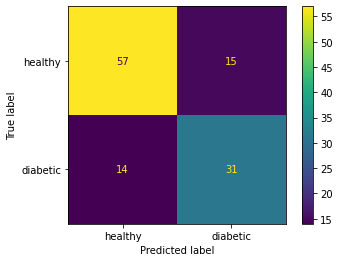

Accuracy =  0.7521367521367521
F1 Score =  0.6813186813186812
Recall Score =  0.6888888888888889
Precision Score =  0.6739130434782609


In [ ]:
#@title Run on validation data

lsvc_y_val = lsvc_clf.predict(x_val)
draw_confusion_matrix(y_val, lsvc_y_val)
print("Accuracy = ", accuracy_score(y_val, lsvc_y_val))
print("F1 Score = ", f1_score(y_val, lsvc_y_val))
print("Recall Score = ", recall_score(y_val, lsvc_y_val))
print("Precision Score = ", precision_score(y_val, lsvc_y_val))

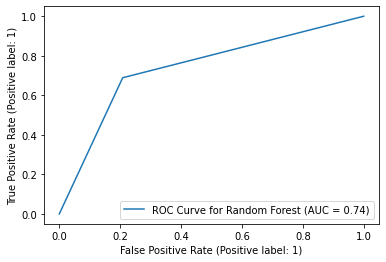

In [ ]:
RocCurveDisplay.from_predictions(y_val, lsvc_y_val, name="ROC Curve for Random Forest")
plt.show()

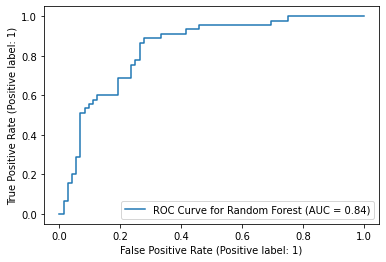

In [ ]:
RocCurveDisplay.from_estimator(lsvc_clf, x_val, y_val, name="ROC Curve for Random Forest")
plt.show()

### SVC

In [ ]:
max_iterations =  2000#@param {type:"integer"}

from sklearn.svm import SVC



svc_clf = SVC(random_state=0, max_iter=max_iterations, C=0.8)
svc_clf.fit(x, y)

SVC(C=0.8, max_iter=2000, random_state=0)

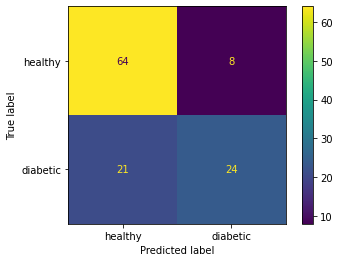

Accuracy =  0.7521367521367521
F1 Score =  0.6233766233766235
Recall Score =  0.5333333333333333
Precision Score =  0.75


In [ ]:
#@title Run on validation data

svc_y_val = svc_clf.predict(x_val)
draw_confusion_matrix(y_val, svc_y_val)
print("Accuracy = ", accuracy_score(y_val, svc_y_val))
print("F1 Score = ", f1_score(y_val, svc_y_val))
print("Recall Score = ", recall_score(y_val, svc_y_val))
print("Precision Score = ", precision_score(y_val, svc_y_val))

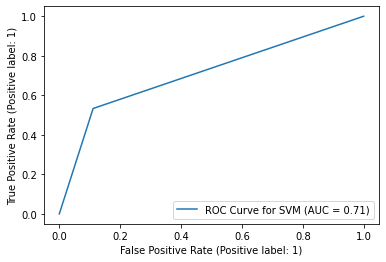

In [ ]:
RocCurveDisplay.from_predictions(y_val, svc_y_val, name="ROC Curve for SVM")
plt.show()

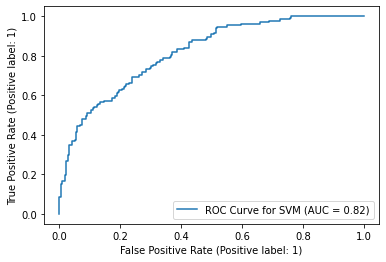

In [ ]:
RocCurveDisplay.from_estimator(svc_clf, x, y, name="ROC Curve for SVM")
plt.show()

## Ensemble Models

### Random Forest

In [ ]:
#@title Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

r_forest_clf = RandomForestClassifier(
    max_depth=4,
    random_state=0,
    n_jobs=4,
    max_samples=100
  )
r_forest_clf.fit(x,y)
clear_output()
print("Done!")

Done!


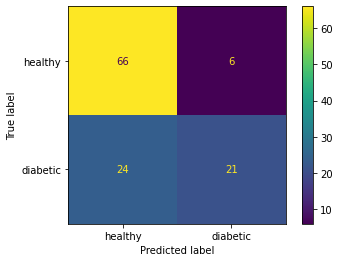

Accuracy =  0.7435897435897436
F1 Score =  0.5833333333333334
Recall Score =  0.4666666666666667
Precision Score =  0.7777777777777778


In [ ]:
#@title Run on validation data

r_forest_y_val = r_forest_clf.predict(x_val)
draw_confusion_matrix(y_val, r_forest_y_val)
print("Accuracy = ", accuracy_score(y_val, r_forest_y_val))
print("F1 Score = ", f1_score(y_val, r_forest_y_val))
print("Recall Score = ", recall_score(y_val, r_forest_y_val))
print("Precision Score = ", precision_score(y_val, r_forest_y_val))

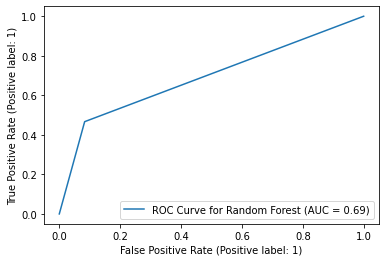

In [ ]:
RocCurveDisplay.from_predictions(y_val, r_forest_y_val, name="ROC Curve for Random Forest")
plt.show()

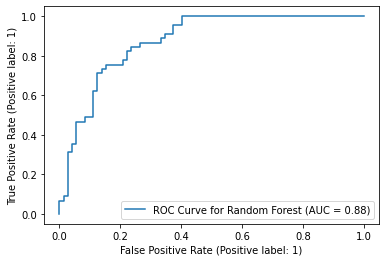

In [ ]:
RocCurveDisplay.from_estimator(r_forest_clf, x_val, y_val, name="ROC Curve for Random Forest")
plt.show()

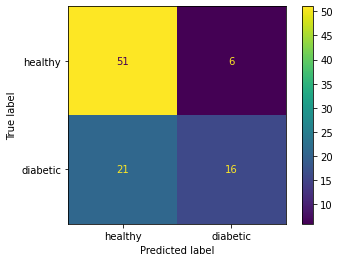

In [ ]:
r_forest_clf.fit(proc_x, proc_y)
r_forest_y_val = r_forest_clf.predict(x_val)
draw_confusion_matrix(y_val, r_forest_y_val)

In [ ]:
print("F1 Score = ", f1_score(y_val, r_forest_y_val))

F1 Score =  0.5423728813559323


In [ ]:
r_forest_y_pred = r_forest_clf.predict(x_test)
d = {'Id': test_df["Id"], 'Outcome': r_forest_y_pred.astype('int32')}
res_df = pd.DataFrame(data=d)
res_df.to_csv(
    path_or_buf='/content/drive/MyDrive/ML/predict_the_diabetes/{}.csv'.format(str(4)+"dep_random_forest"),
    index=False
  )

### Ada Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier



In [ ]:
orig_df = pd.read_csv('/content/drive/MyDrive/ML/predict_the_diabetes/diabetes.csv')
orig_df.count(0)

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64